# Plot the flow data for the Salmon River


In [1]:
import pandas as pd
import os

## Import the ParFlow data
The Snake River subset was ran for one year using NLDAS forcings. The Salmon River data is used because it is free from dam control.

The ParFlow pressure and saturation outputs have been processed with a variation of [this .tcl script](https://github.com/hydroframe/ParFlow_Short_Course/blob/master/Exercises/Little_Washita/PrePost_Processing/Flow_Calculation.tcl) from the [ParFlow Short Course](https://github.com/hydroframe/ParFlow_Short_Course)


In [2]:
parflow_data = pd.read_csv(os.path.join('.','flow_out.txt'),'\t',header=None, names=['Time','Pressure','Flow_CMS','none'])
parflow_data

,Time,Pressure,Flow_CMS,none
0,0,2.303712,639.448252,NaN
1,1,2.200404,592.373845,NaN
2,2,2.102183,548.962318,NaN
3,3,2.041805,522.936276,NaN
4,4,2.013007,510.701409,NaN
...,...,...,...,...
361,361,0.016695,0.173548,NaN
362,362,0.015463,0.152724,NaN
363,363,0.014166,0.131982,NaN
364,364,0.012614,0.108769,NaN


### Convert the date index to a proper date/time
The script that generated the flow data from ParFlow outputs has each day numbered from 1-365, we will convert that to actual date/time so it conveys the proper information.


In [3]:
parflow_data['date']= pd.to_datetime(parflow_data.Time, unit='D', origin=pd.Timestamp('2014-10-01'))
parflow_data

,Time,Pressure,Flow_CMS,none,date
0,0,2.303712,639.448252,NaN,2014-10-01
1,1,2.200404,592.373845,NaN,2014-10-02
2,2,2.102183,548.962318,NaN,2014-10-03
3,3,2.041805,522.936276,NaN,2014-10-04
4,4,2.013007,510.701409,NaN,2014-10-05
...,...,...,...,...,...
361,361,0.016695,0.173548,NaN,2015-09-27
362,362,0.015463,0.152724,NaN,2015-09-28
363,363,0.014166,0.131982,NaN,2015-09-29
364,364,0.012614,0.108769,NaN,2015-09-30


### Convert the flow data from CMS to CFS
The ParFlow data is in cubic meters per second, and the usgs data is in cubic feet per second. Get the conversion rate from Google, or someone you trust.

In [4]:
parflow_data['Flow_CFS']= parflow_data.Flow_CMS * 35.3147
parflow_data

,Time,Pressure,Flow_CMS,none,date,Flow_CFS
0,0,2.303712,639.448252,NaN,2014-10-01,22581.923194
1,1,2.200404,592.373845,NaN,2014-10-02,20919.504611
2,2,2.102183,548.962318,NaN,2014-10-03,19386.439572
3,3,2.041805,522.936276,NaN,2014-10-04,18467.337715
4,4,2.013007,510.701409,NaN,2014-10-05,18035.267036
...,...,...,...,...,...,...
361,361,0.016695,0.173548,NaN,2015-09-27,6.128805
362,362,0.015463,0.152724,NaN,2015-09-28,5.393411
363,363,0.014166,0.131982,NaN,2015-09-29,4.660901
364,364,0.012614,0.108769,NaN,2015-09-30,3.841146


### Drop columns we don't need
These are left overs from the original data

In [5]:
parflow_data = parflow_data.drop(['Flow_CMS','Time'], axis=1)

### Plot the data in a line graph
Let's visualize the data

Text(0, 0.5, 'CFS')

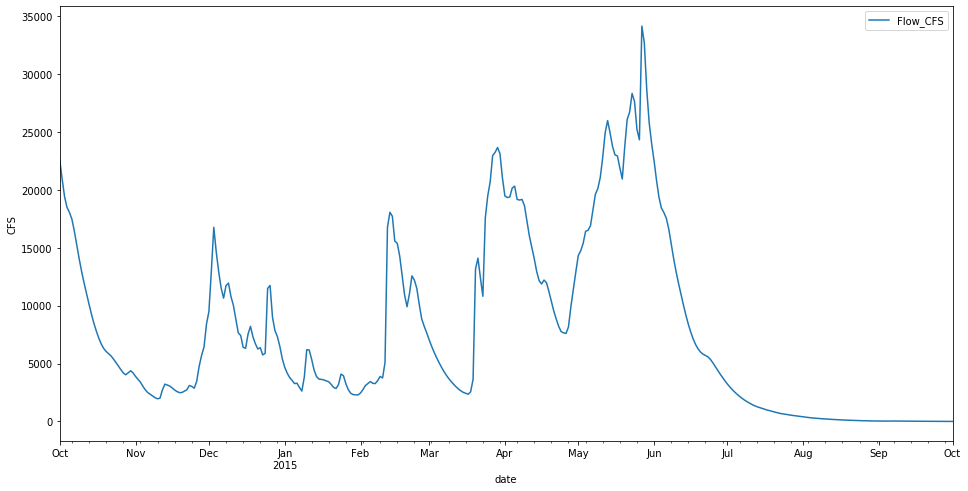

In [7]:
parflow_plot = parflow_data.plot(x='date', y='Flow_CFS', kind='line', figsize=(16,8))
parflow_plot.set_ylabel("CFS")

## Import the USGS data from a text file
This tab separated data was pulled from [USGS Flow Data](https://waterdata.usgs.gov/id/nwis/dv?cb_00060=on&format=rdb&site_no=13317000&referred_module=sw&period=&begin_date=2014-10-01&end_date=2015-09-30)

[USGS Gauge Information](https://waterdata.usgs.gov/id/nwis/dv/?site_no=13317000&agency_cd=USGS&amp;referred_module=sw)

The data file has no headers `header=None` so we'll give it some friendly names `names=['c1','c2','date_string','flow_CFS','c3']`


In [8]:
usgs_data = pd.read_csv(os.path.join('.','usgs_salmon_flow.txt'),'\t', header=None, names=['c1','c2','date_string','flow_CFS','c3'])
usgs_data

,c1,c2,date_string,flow_CFS,c3
0,USGS,13317000,2014-10-01,4820,A
1,USGS,13317000,2014-10-02,5140,A
2,USGS,13317000,2014-10-03,4910,A
3,USGS,13317000,2014-10-04,4670,A
4,USGS,13317000,2014-10-05,4530,A
...,...,...,...,...,...
360,USGS,13317000,2015-09-26,3480,A
361,USGS,13317000,2015-09-27,3420,A
362,USGS,13317000,2015-09-28,3390,A
363,USGS,13317000,2015-09-29,3370,A


## Convert the date from string to a proper date/time type
Pandas treated our dates like strings, let's convert to proper datatype

In [9]:
usgs_data['date'] = pd.to_datetime(usgs_data.date_string)
usgs_data

,c1,c2,date_string,flow_CFS,c3,date
0,USGS,13317000,2014-10-01,4820,A,2014-10-01
1,USGS,13317000,2014-10-02,5140,A,2014-10-02
2,USGS,13317000,2014-10-03,4910,A,2014-10-03
3,USGS,13317000,2014-10-04,4670,A,2014-10-04
4,USGS,13317000,2014-10-05,4530,A,2014-10-05
...,...,...,...,...,...,...
360,USGS,13317000,2015-09-26,3480,A,2015-09-26
361,USGS,13317000,2015-09-27,3420,A,2015-09-27
362,USGS,13317000,2015-09-28,3390,A,2015-09-28
363,USGS,13317000,2015-09-29,3370,A,2015-09-29


## Drop columns we don't need
These are vestiges from the data we got from the USGS, which we don't care about

In [10]:
usgs_data = usgs_data.drop(['c1','c2','c3','date_string'],axis=1)
usgs_data

,flow_CFS,date
0,4820,2014-10-01
1,5140,2014-10-02
2,4910,2014-10-03
3,4670,2014-10-04
4,4530,2014-10-05
...,...,...
360,3480,2015-09-26
361,3420,2015-09-27
362,3390,2015-09-28
363,3370,2015-09-29


Text(0, 0.5, 'CFS')

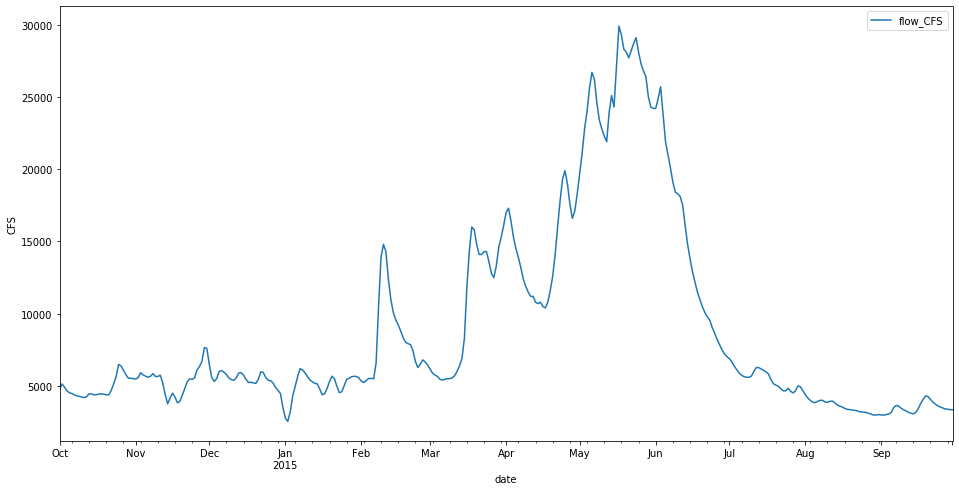

In [11]:
usgs_plot = usgs_data.plot(x='date', y='flow_CFS', kind='line', figsize=(16,8))
usgs_plot.set_ylabel("CFS")

### Wouldn't it be nice if the data was plotted together?
There are probably better ways to do this...but the result is...encouraging!

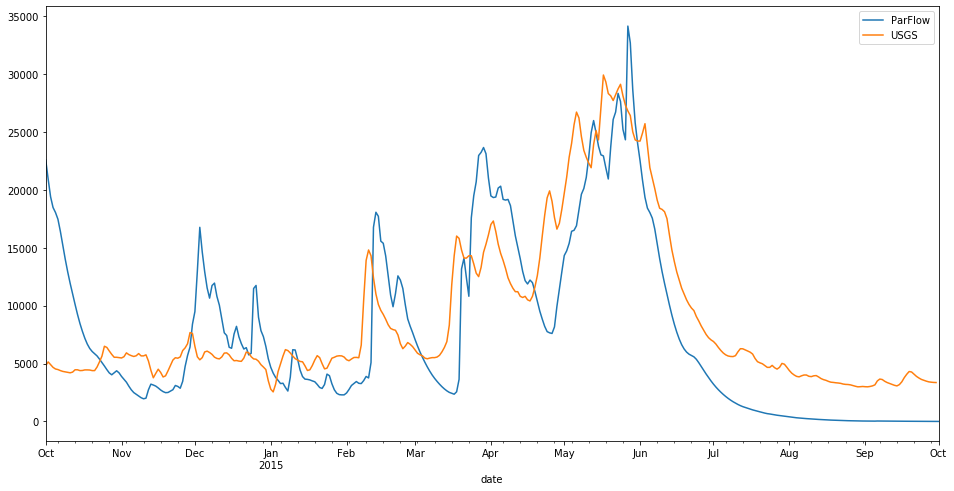

In [13]:
ax = parflow_data.plot(x='date', y='Flow_CFS', kind='line', figsize=(16,8), label='ParFlow' )
compare_data = usgs_data.plot(ax=ax,x='date', y='flow_CFS', kind='line', figsize=(16,8), label='USGS')
